##### Assignment

In this assignment, you'll continue working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

Submit your work below, and plan on discussing with your mentor. You can also take a look at these example solutions.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from sqlalchemy import create_engine
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

studentsperformance_df = pd.read_sql_query('select * from studentsperformance',con=engine)


engine.dispose()


In [2]:
studentsperformance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
studentsperformance_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### question 1
Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

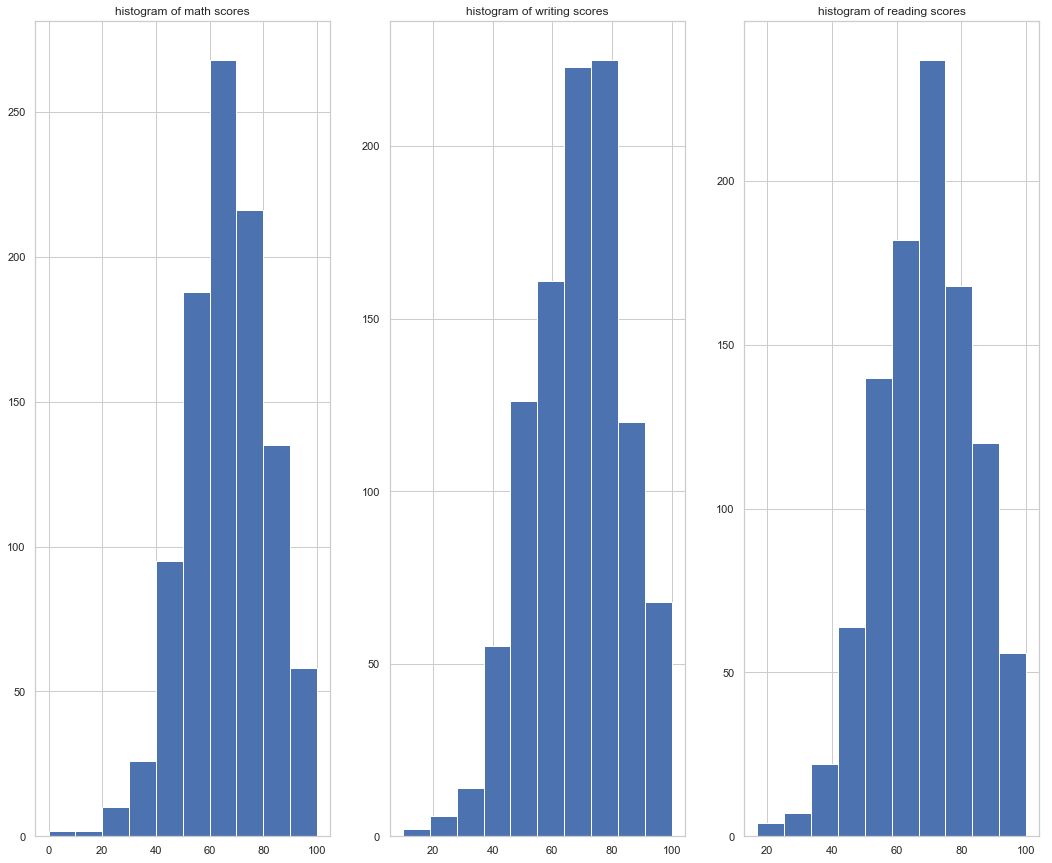

In [4]:
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(1, 3, 1)
plt.hist(studentsperformance_df['math score'])
plt.title('histogram of math scores')

plt.subplot(1, 3, 2)
plt.hist(studentsperformance_df['writing score'])
plt.title('histogram of writing scores')

plt.subplot(1, 3, 3)
plt.hist(studentsperformance_df['reading score'])
plt.title('histogram of reading scores')

plt.show()

In [5]:
jb_stats = jarque_bera(np.sqrt(studentsperformance_df['math score']))
norm_stats = normaltest(np.sqrt(studentsperformance_df['math score']))

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(studentsperformance_df['writing score']))
norm_stats = normaltest(np.sqrt(studentsperformance_df['writing score']))

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(studentsperformance_df['reading score']))
norm_stats = normaltest(np.sqrt(studentsperformance_df['reading score']))

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1233.4799726707836 and p value is 0.0
Normality test statistics is 259.4703560154713 and p value is 4.536574867826489e-57
Jarque-Bera test statistics is 141.6378240717818 and p value is 0.0
Normality test statistics is 97.39700939472482 and p value is 7.087745794883206e-22
Jarque-Bera test statistics is 88.0083349548674 and p value is 0.0
Normality test statistics is 70.4238348783534 and p value is 5.101038001506264e-16


p-value of 0.0 indicates data are not normally distributed

In [ ]:
type(reading_scores_boxcox)

In [ ]:
reading_scores_boxcox[0]

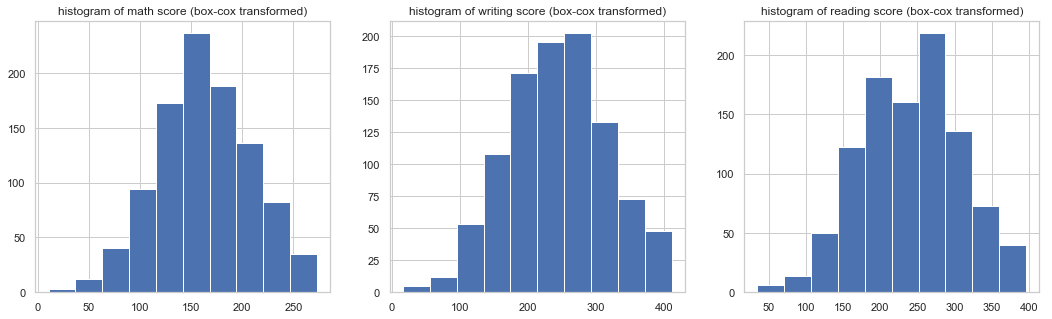

In [6]:
from scipy.stats import boxcox
#error due to data that was not positive, cannot run boxcox, excluding math score of 0
# the ,_ after variable name indicates that we are only interested in the first element of the tuple,
# with the ,_ there is no need to index [0] when the variable is used in later code
math_scores_boxcox,_ = boxcox(studentsperformance_df[studentsperformance_df['math score'] > 0]['math score'])
writing_scores_boxcox,_ = boxcox(studentsperformance_df['writing score'])
reading_scores_boxcox,_ = boxcox(studentsperformance_df['reading score'])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(math_scores_boxcox)
plt.title('histogram of math score (box-cox transformed)')

plt.subplot(1, 3, 2)
plt.hist(writing_scores_boxcox)
plt.title('histogram of writing score (box-cox transformed)')

plt.subplot(1, 3, 3)
plt.hist(reading_scores_boxcox)
plt.title('histogram of reading score (box-cox transformed)')

plt.show()

In [8]:
jb_stats = jarque_bera(np.sqrt(studentsperformance_df['math score']))
norm_stats = normaltest(np.sqrt(studentsperformance_df['math score']))

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(studentsperformance_df['writing score']))
norm_stats = normaltest(np.sqrt(studentsperformance_df['writing score']))

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(studentsperformance_df['reading score']))
norm_stats = normaltest(np.sqrt(studentsperformance_df['reading score']))

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(math_scores_boxcox)
norm_stats = normaltest(math_scores_boxcox)

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_scores_boxcox)
norm_stats = normaltest(writing_scores_boxcox)

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_scores_boxcox)
norm_stats = normaltest(reading_scores_boxcox)

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1233.4799726707836 and p value is 0.0
Normality test statistics is 259.4703560154713 and p value is 4.536574867826489e-57
Jarque-Bera test statistics is 141.6378240717818 and p value is 0.0
Normality test statistics is 97.39700939472482 and p value is 7.087745794883206e-22
Jarque-Bera test statistics is 88.0083349548674 and p value is 0.0
Normality test statistics is 70.4238348783534 and p value is 5.101038001506264e-16
Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics is 1.8323073377495822 and p value is 0.40005482895717037
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467


##### question2
Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

example given is not "weighted" average, but will use in order to be able to follow example

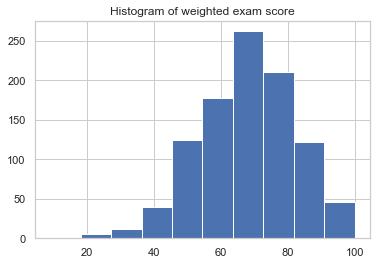

In [14]:
wt_score = (studentsperformance_df['math score'] + studentsperformance_df['reading score'] + studentsperformance_df['writing score'])/3

plt.hist(wt_score)
plt.title('Histogram of weighted exam score')
plt.show()

In [15]:
jb_stats = jarque_bera(wt_score)
norm_stats = normaltest(wt_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


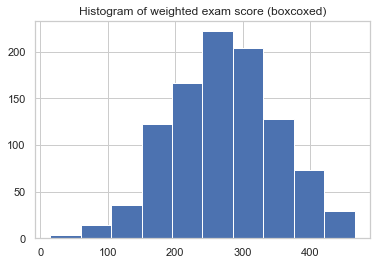

In [16]:
wt_score_boxcox,_ = boxcox(wt_score)

plt.hist(wt_score_boxcox)
plt.title('Histogram of weighted exam score (boxcoxed)')
plt.show()

In [17]:
jb_stats = jarque_bera(wt_score_boxcox)
norm_stats = normaltest(wt_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
Normality test statistics is 2.779857245981238 and p value is 0.2490930835165177


##### question 3
Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [18]:
studentsperformance_df['wt_score_boxcox'] = wt_score_boxcox

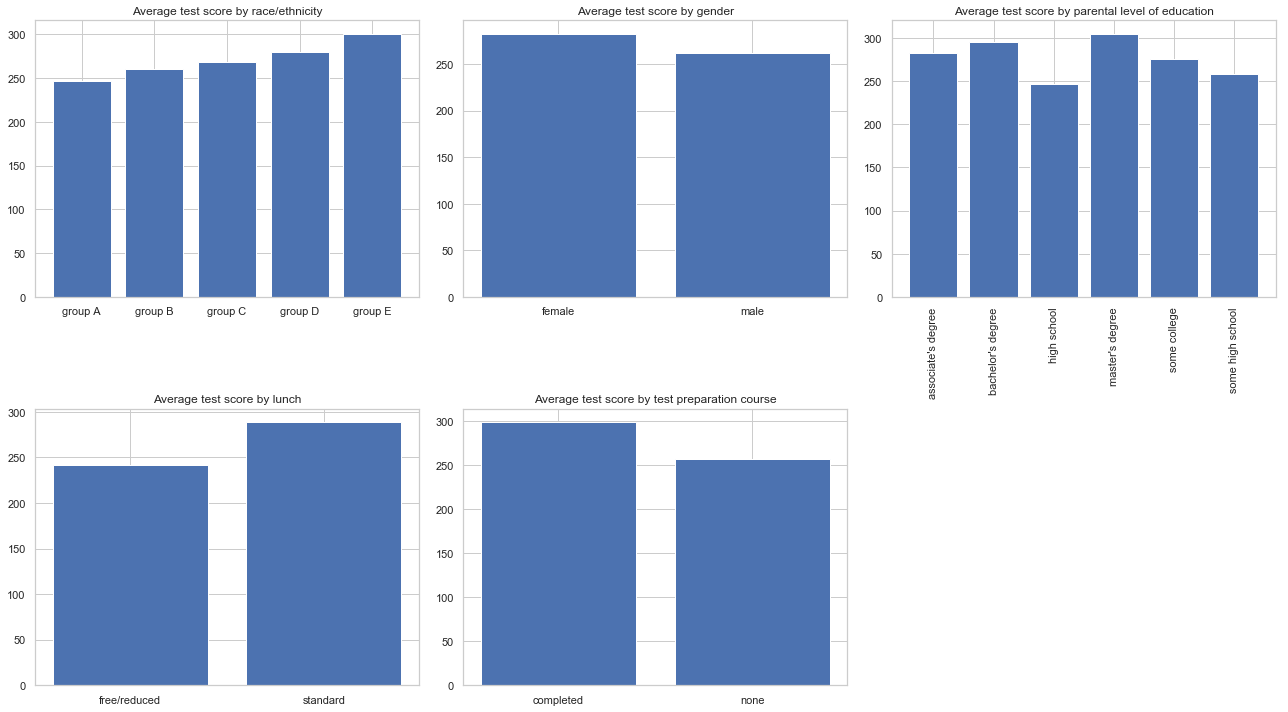

In [29]:
plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
plt.bar(studentsperformance_df.groupby('race/ethnicity')['wt_score_boxcox'].mean().index, 
        studentsperformance_df.groupby('race/ethnicity')['wt_score_boxcox'].mean())
plt.title('Average test score by race/ethnicity')

plt.subplot(2,3,2)
plt.bar(studentsperformance_df.groupby('gender')['wt_score_boxcox'].mean().index, 
       studentsperformance_df.groupby('gender')['wt_score_boxcox'].mean())
plt.title('Average test score by gender')

plt.subplot(2,3,3)
plt.bar(studentsperformance_df.groupby('parental level of education')['wt_score_boxcox'].mean().index,
       studentsperformance_df.groupby('parental level of education')['wt_score_boxcox'].mean())
plt.xticks(rotation='vertical')
plt.title('Average test score by parental level of education')

plt.subplot(2,3,4)
plt.bar(studentsperformance_df.groupby('lunch')['wt_score_boxcox'].mean().index,
       studentsperformance_df.groupby('lunch')['wt_score_boxcox'].mean())
plt.title('Average test score by lunch')

plt.subplot(2,3,5)
plt.bar(studentsperformance_df.groupby('test preparation course')['wt_score_boxcox'].mean().index,
       studentsperformance_df.groupby('test preparation course')['wt_score_boxcox'].mean())
plt.title('Average test score by test preparation course')

plt.tight_layout()
plt.show()

1. As seen with the individual test scores, there does appear to be a significant difference in test scores based on race/ethnicity, with group E performing the best and group A performing the worst. 
2. In individual testing, females performed better in reading & writing while males performed better in math. In the combined average, females are outperforming males.
3. There is a clear effect of the parental level of education on the test performance. The higher the parental education level, the better the test results. 
4. There is a clear effect on standard vs free/reduced lunch on test performance. Those in the standard lunch group perform better than those in the free/reduced lunch group. A possible explanation for this may be due to the correlation between parenteral education level and test performance. It is widely known that there is a correlation between education level and income. It seems reasonable to assume that in general, those with higher eduction levels likely are in the standard lunch group and those with lower education levels are in the free/standard lunch group. Since the lunch is the same in each group, this difference in test performance in likely due to an unmeasured socio-economic factor. 
5. Those students in the test prep group clearly outperformed those who did not take part in the course.  

In [20]:
studentsperformance_df.corr()

,math score,reading score,writing score,wt_score_boxcox
math score,1.000000,0.817580,0.802642,0.916145
reading score,0.817580,1.000000,0.954598,0.968836
writing score,0.802642,0.954598,1.000000,0.963205
wt_score_boxcox,0.916145,0.968836,0.963205,1.000000


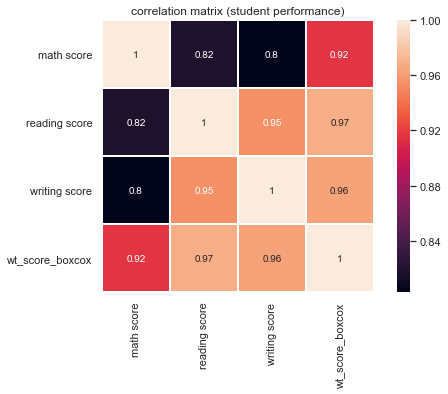

In [30]:
corrmat_student = studentsperformance_df.corr()


plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# draw the heatmap using seaborn.
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.yticks(rotation='horizontal')
plt.title("correlation matrix (student performance)")

plt.show()